<a href="https://colab.research.google.com/github/Lucas-Jimenez-uribe/telecom_x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [80]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [81]:
df.shape

(7267, 6)

#🔧 Transformación

In [82]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [84]:
df_original = df.copy()

col_inicio = df.columns.get_loc('customer')

# Seleccionar todas las columnas desde esa en adelante
cols_a_normalizar = df.columns[col_inicio:]

# Extraer esas columnas como diccionarios por fila
registros = df[cols_a_normalizar].to_dict(orient='records')

# Normalizar
df = df_normalizado = pd.json_normalize(registros)

# Guardar las columnas que quedaron afuera
columnas_anteriores = df_original[['customerID', 'Churn']].reset_index(drop=True)

# Unirlas al nuevo dataframe normalizado
df = pd.concat([columnas_anteriores, df_normalizado], axis=1)

In [85]:
df.duplicated().sum()
df = df.drop_duplicates()

In [86]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [87]:
# Lista de columnas donde vas a reemplazar NaN por 0
columnas_binarias = [
    'cliente_cancelado',
    'lineas_telefonicas_multiples',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas',
]



In [89]:
df['account.Charges.Total'].unique()

df['account.Charges.Total'] = df['account.Charges.Total'].replace('', np.nan)

df['account.Charges.Total'] = df['account.Charges.Total'].str.strip()

df['account.Charges.Total'] = df['account.Charges.Total'].astype(float)



In [90]:
# Aplicar str.lower() y str.strip() a todas las columnas de texto
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()


In [ ]:
# Ver cuántas veces aparecen en cada columna
valores_nulos_falsos = ['n/a', 'na', 'null', 'none', '']

for valor in valores_nulos_falsos:
    print(f"--- Buscando '{valor}' ---")
    print((df == valor).sum())



In [ ]:
df.info()

In [ ]:
df.columns

In [94]:
df = df.rename(columns={
    'customerID': 'cliente_id',
    'Churn': 'cliente_cancelado',
    'customer.gender': 'cliente_genero',
    'customer.SeniorCitizen': 'cliente_es_senior',
    'customer.Partner': 'cliente_tiene_pareja',
    'customer.Dependents': 'cliente_tiene_dependientes',
    'customer.tenure': 'cliente_antiguedad_meses',

    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_telefonicas_multiples',

    'internet.InternetService': 'internet_tipo',
    'internet.OnlineSecurity': 'internet_seguridad_en_linea',
    'internet.OnlineBackup': 'internet_respaldo_en_linea',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_streaming_tv',
    'internet.StreamingMovies': 'internet_streaming_peliculas',

    'account.Contract': 'cuenta_contrato',
    'account.PaperlessBilling': 'cuenta_facturacion_electronica',
    'account.PaymentMethod': 'cuenta_metodo_pago',
    'account.Charges.Monthly': 'cuenta_cargos_mensuales',
    'account.Charges.Total': 'cuenta_cargos_totales'
})


In [ ]:
df.head()

In [96]:
df['cuentas_diarias'] = (df['cuenta_cargos_mensuales'] / 30).round(2)

In [97]:
columnas_binarias = ['cliente_cancelado', 'cliente_tiene_pareja', 'cliente_tiene_dependientes', 'servicio_telefonico', 'lineas_telefonicas_multiples','internet_proteccion_dispositivo', 'internet_soporte_tecnico','internet_streaming_tv','internet_streaming_peliculas','cuenta_facturacion_electronica' ]
for col in columnas_binarias:
    df[col] = df[col].map({'yes': 1, 'no': 0})



In [ ]:
for col in columnas_binarias:
    print(f"{col}: {df[col].unique()}")

df[columnas_binarias] = df[columnas_binarias].fillna(0)


In [ ]:
columnas_binarias

#📊 Carga y análisis

In [ ]:
df.head()

In [ ]:
df.describe()

<ipython-input-111-1198667711>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




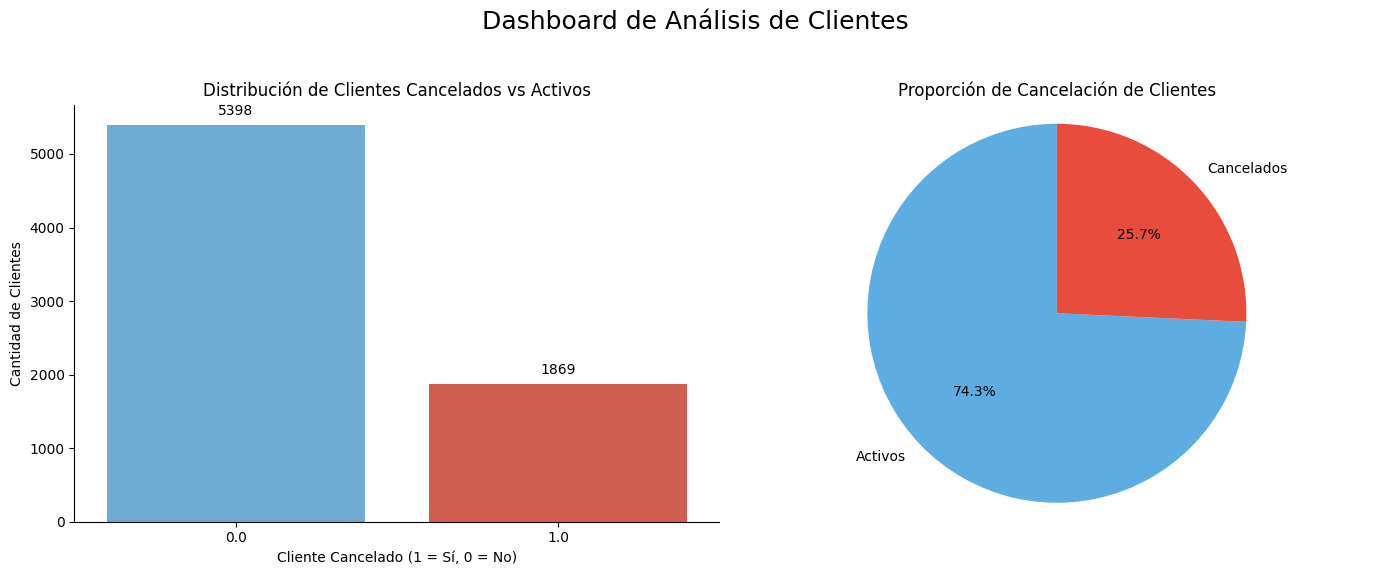

In [111]:

# 1. Crear la figura y la cuadrícula de 1x2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Dashboard de Análisis de Clientes', fontsize=18)

# --- Gráfica 1: Distribución (Izquierda) [axes[0]] ---
ax_countplot = sns.countplot(data=df, x='cliente_cancelado', ax=axes[0], palette=['#5DADE2', '#E74C3C'])
ax_countplot.set_title('Distribución de Clientes Cancelados vs Activos')
ax_countplot.set_xlabel('Cliente Cancelado (1 = Sí, 0 = No)')
ax_countplot.set_ylabel('Cantidad de Clientes')
ax_countplot.spines['top'].set_visible(False)
ax_countplot.spines['right'].set_visible(False)

for p in ax_countplot.patches:
    ax_countplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# --- Gráfica 2: Proporción (Derecha) [axes[1]] ---
# Primero, calculamos los valores para la gráfica de torta
valores = df['cliente_cancelado'].value_counts()
labels = ['Activos', 'Cancelados']
colors = ['#5DADE2', '#E74C3C']

# Ahora, dibujamos la gráfica en el eje correspondiente
axes[1].pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporción de Cancelación de Clientes')
axes[1].axis('equal')  # Asegura que la gráfica de torta sea circular

fig.savefig('/content/analisis_clientes.png',
            transparent=False,dpi=300,bbox_inches='tight')

# 3. Ajustar y mostrar la figura completa
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # El rect deja espacio para el título general
plt.show()

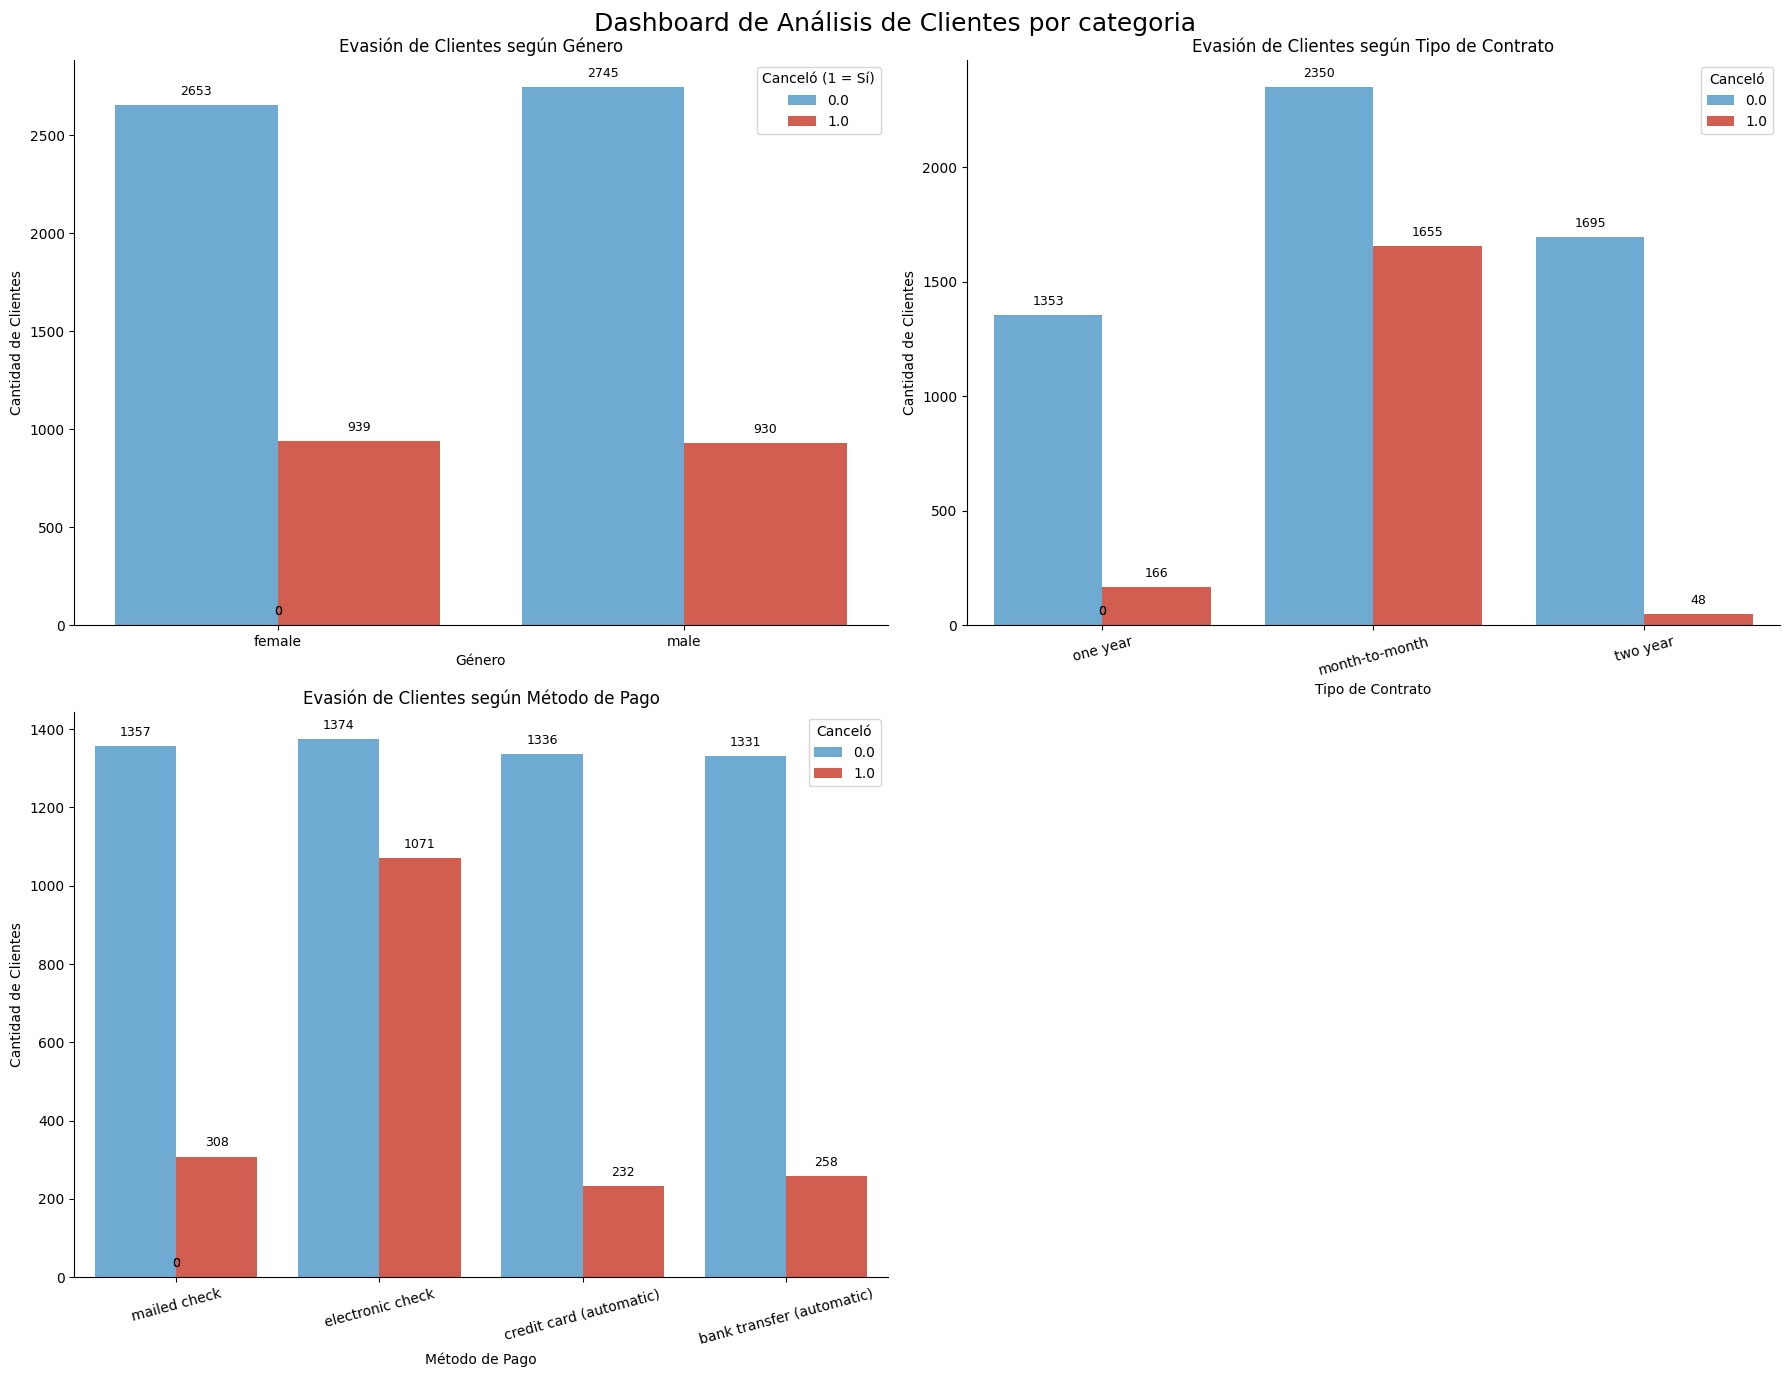

In [110]:
# Crear la figura y la cuadrícula para 3 subplots (2 filas, 2 columnas)
# Esto crea una cuadrícula de 4 espacios, dejando uno vacío.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Dashboard de Análisis de Clientes por categoria', fontsize=18)

# --- Primera figura: Evasión de Clientes según Género (axes[0, 0]) ---
sns.countplot(data=df, x='cliente_genero', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[0, 0])
axes[0, 0].set_title('Evasión de Clientes según Género')
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Cantidad de Clientes')
axes[0, 0].legend(title='Canceló (1 = Sí)')
axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)

# Añadir los números exactos en la parte superior de los rectángulos para axes[0, 0]
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# --- Segunda figura: Evasión de Clientes según Tipo de Contrato (axes[0, 1]) ---
sns.countplot(data=df, x='cuenta_contrato', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[0, 1])
axes[0, 1].set_title('Evasión de Clientes según Tipo de Contrato')
axes[0, 1].set_xlabel('Tipo de Contrato')
axes[0, 1].set_ylabel('Cantidad de Clientes')
axes[0, 1].legend(title='Canceló')
axes[0, 1].tick_params(axis='x', rotation=15) # Rotar las etiquetas del eje X
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)

# Añadir los números exactos en la parte superior de los rectángulos para axes[0, 0]
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# --- Tercera figura: Evasión de Clientes según Método de Pago (axes[1, 0]) ---
sns.countplot(data=df, x='cuenta_metodo_pago', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[1, 0])
axes[1, 0].set_title('Evasión de Clientes según Método de Pago')
axes[1, 0].set_xlabel('Método de Pago')
axes[1, 0].set_ylabel('Cantidad de Clientes')
axes[1, 0].legend(title='Canceló')
axes[1, 0].tick_params(axis='x', rotation=15) # Rotar las etiquetas del eje X
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)

# Añadir los números exactos en la parte superior de los rectángulos para axes[0, 0]
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# --- Ocultar el cuarto subplot (axes[1, 1]) ya que no lo estamos usando ---
axes[1, 1].axis('off')

fig.savefig('/content/analisis_categorico.png',
            transparent=False,dpi=300,bbox_inches='tight')

# Ajustar el diseño para evitar superposiciones y mostrar la figura
plt.tight_layout()
plt.show()

In [109]:
# Función para agrupar y calcular % de cancelación
def calcular_porcentaje_cancelacion(df, columna, bins=10):
    df_temp = df.copy()
    df_temp['bin'] = pd.cut(df_temp[columna], bins=bins)
    abandono = df_temp.groupby('bin')['cliente_cancelado'].mean().reset_index()
    abandono['columna'] = columna
    abandono['rango_str'] = abandono['bin'].astype(str)
    abandono.rename(columns={'cliente_cancelado': 'porcentaje_abandono'}, inplace=True)
    abandono['porcentaje_abandono'] *= 100
    return abandono

# Aplicar a todas las variables
variables = ['cliente_antiguedad_meses', 'cuenta_cargos_mensuales', 'cuenta_cargos_totales', 'cuentas_diarias']
df_porcentajes = pd.concat([calcular_porcentaje_cancelacion(df, var) for var in variables])

# Gráfico interactivo
fig = px.bar(df_porcentajes,
             x='rango_str',
             y='porcentaje_abandono',
             color='columna',
             labels={'rango_str': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'columna': 'Variable'},
             title='Porcentaje de abandono según variables numéricas')
fig.update_layout(xaxis_tickangle=-45)

fig.write_html('/content/porcentanje_de_abandono_segun_variables_numericas.html')
fig.show()

<ipython-input-109-2952319527>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-109-2952319527>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-109-2952319527>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-109-2952319527>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

In [ ]:
df

#📄Informe final

**Informe de Análisis de Evasión de Clientes (Churn)**

**🔹 Introducción**

Este informe presenta un análisis exploratorio de datos (EDA) centrado en el fenómeno de la evasión o "churn" de clientes en el sector de telecomunicaciones. El objetivo principal es identificar patrones, características y comportamientos que diferencian a los clientes que deciden cancelar sus servicios (clientes "churned") de aquellos que permanecen activos. Comprender las causas de la evasión es crucial para implementar estrategias de retención efectivas y reducir la pérdida de ingresos.

La evasión de clientes representa un desafío significativo para las empresas, ya que adquirir nuevos clientes es considerablemente más costoso que retener a los existentes. Al analizar los datos históricos de los clientes, buscamos descubrir qué factores están más fuertemente correlacionados con la decisión de cancelar, permitiendo a la empresa tomar decisiones informadas para mejorar la satisfacción y la lealtad del cliente.


**🔹 Limpieza y Tratamiento de Datos**

Importación de Librerías y Carga de Datos Para este análisis, utilizamos las librerías `pandas` para la manipulación de datos, `numpy` para operaciones numéricas, y `matplotlib.pyplot` y `seaborn` para la visualización.

**Pasos de Limpieza y Procesamiento**


**Manejo de valores nulos:**  Identificación y tratamiento (eliminación, imputación) de datos faltantes.
Python

**Conversión de tipos de datos:** Asegurar que las columnas tengan el tipo de dato correcto (numérico, categórico, fecha).

**🔹 Análisis Exploratorio de Datos**

En esta sección, visualizamos las relaciones entre las variables y el estado de cancelación (cliente_cancelado) para identificar patrones relevantes.

**Distribución de Clientes por Estado de Cancelación**
Comenzamos analizando la proporción de clientes que han cancelado sus servicios.
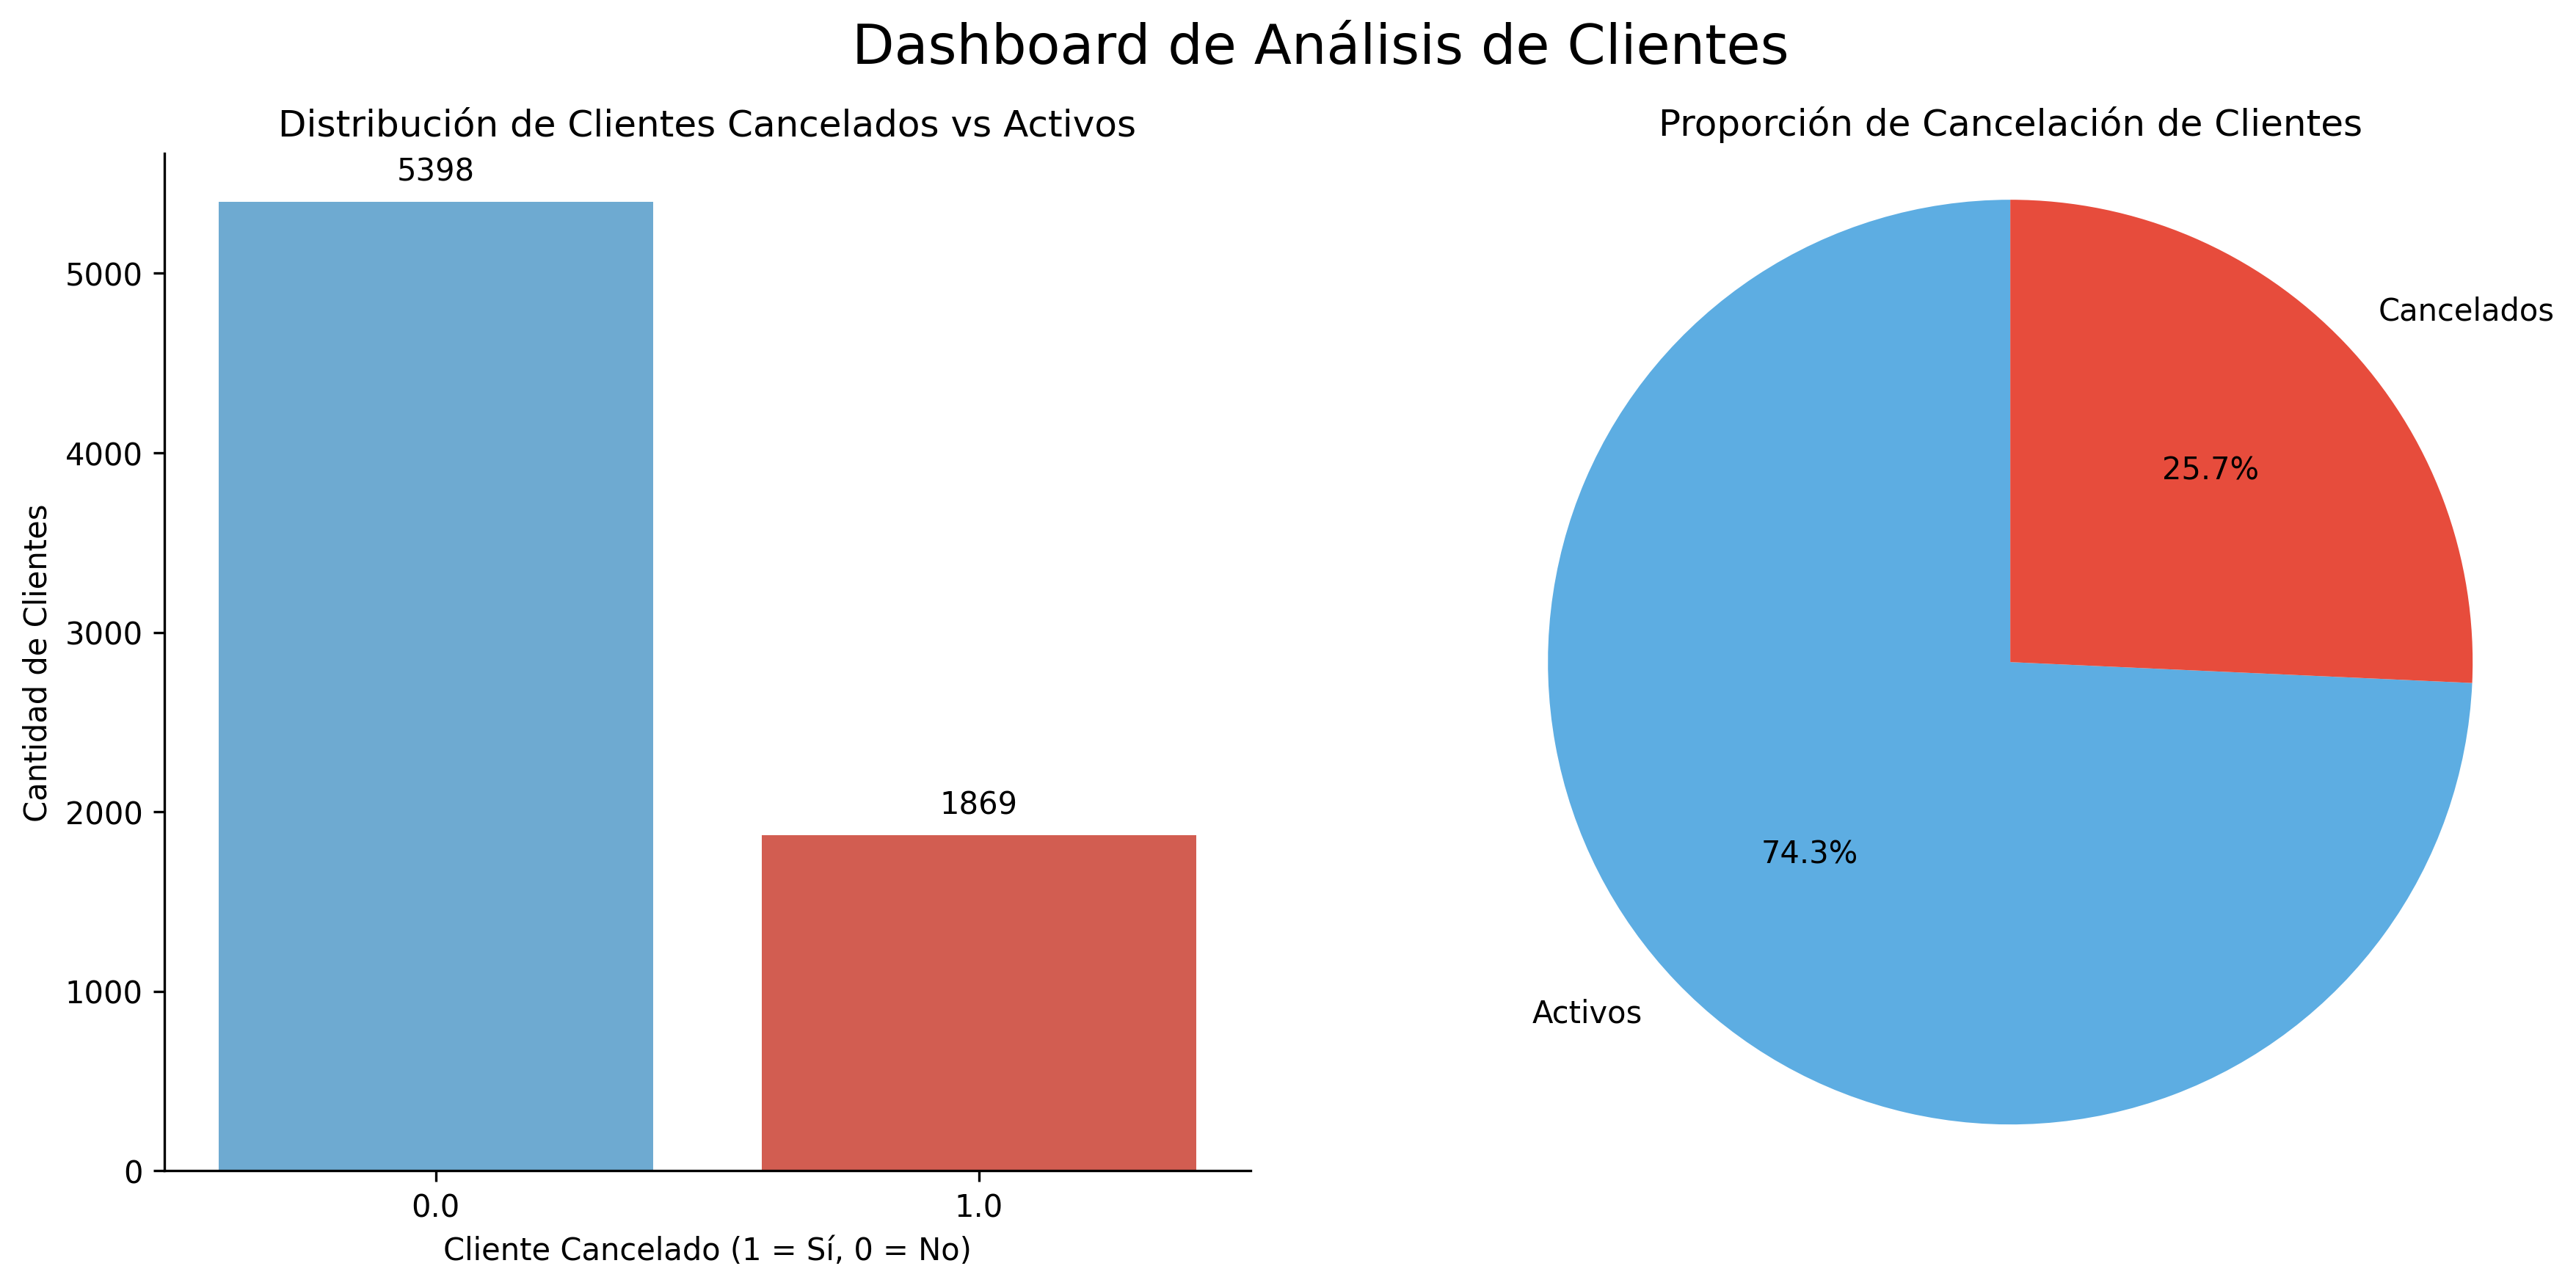

**Análisis de Variables Categóricas y su Relación con la Evasión**
Aquí exploramos cómo diferentes características categóricas de los clientes (como género, tipo de contrato, método de pago) se relacionan con la tasa de cancelación.

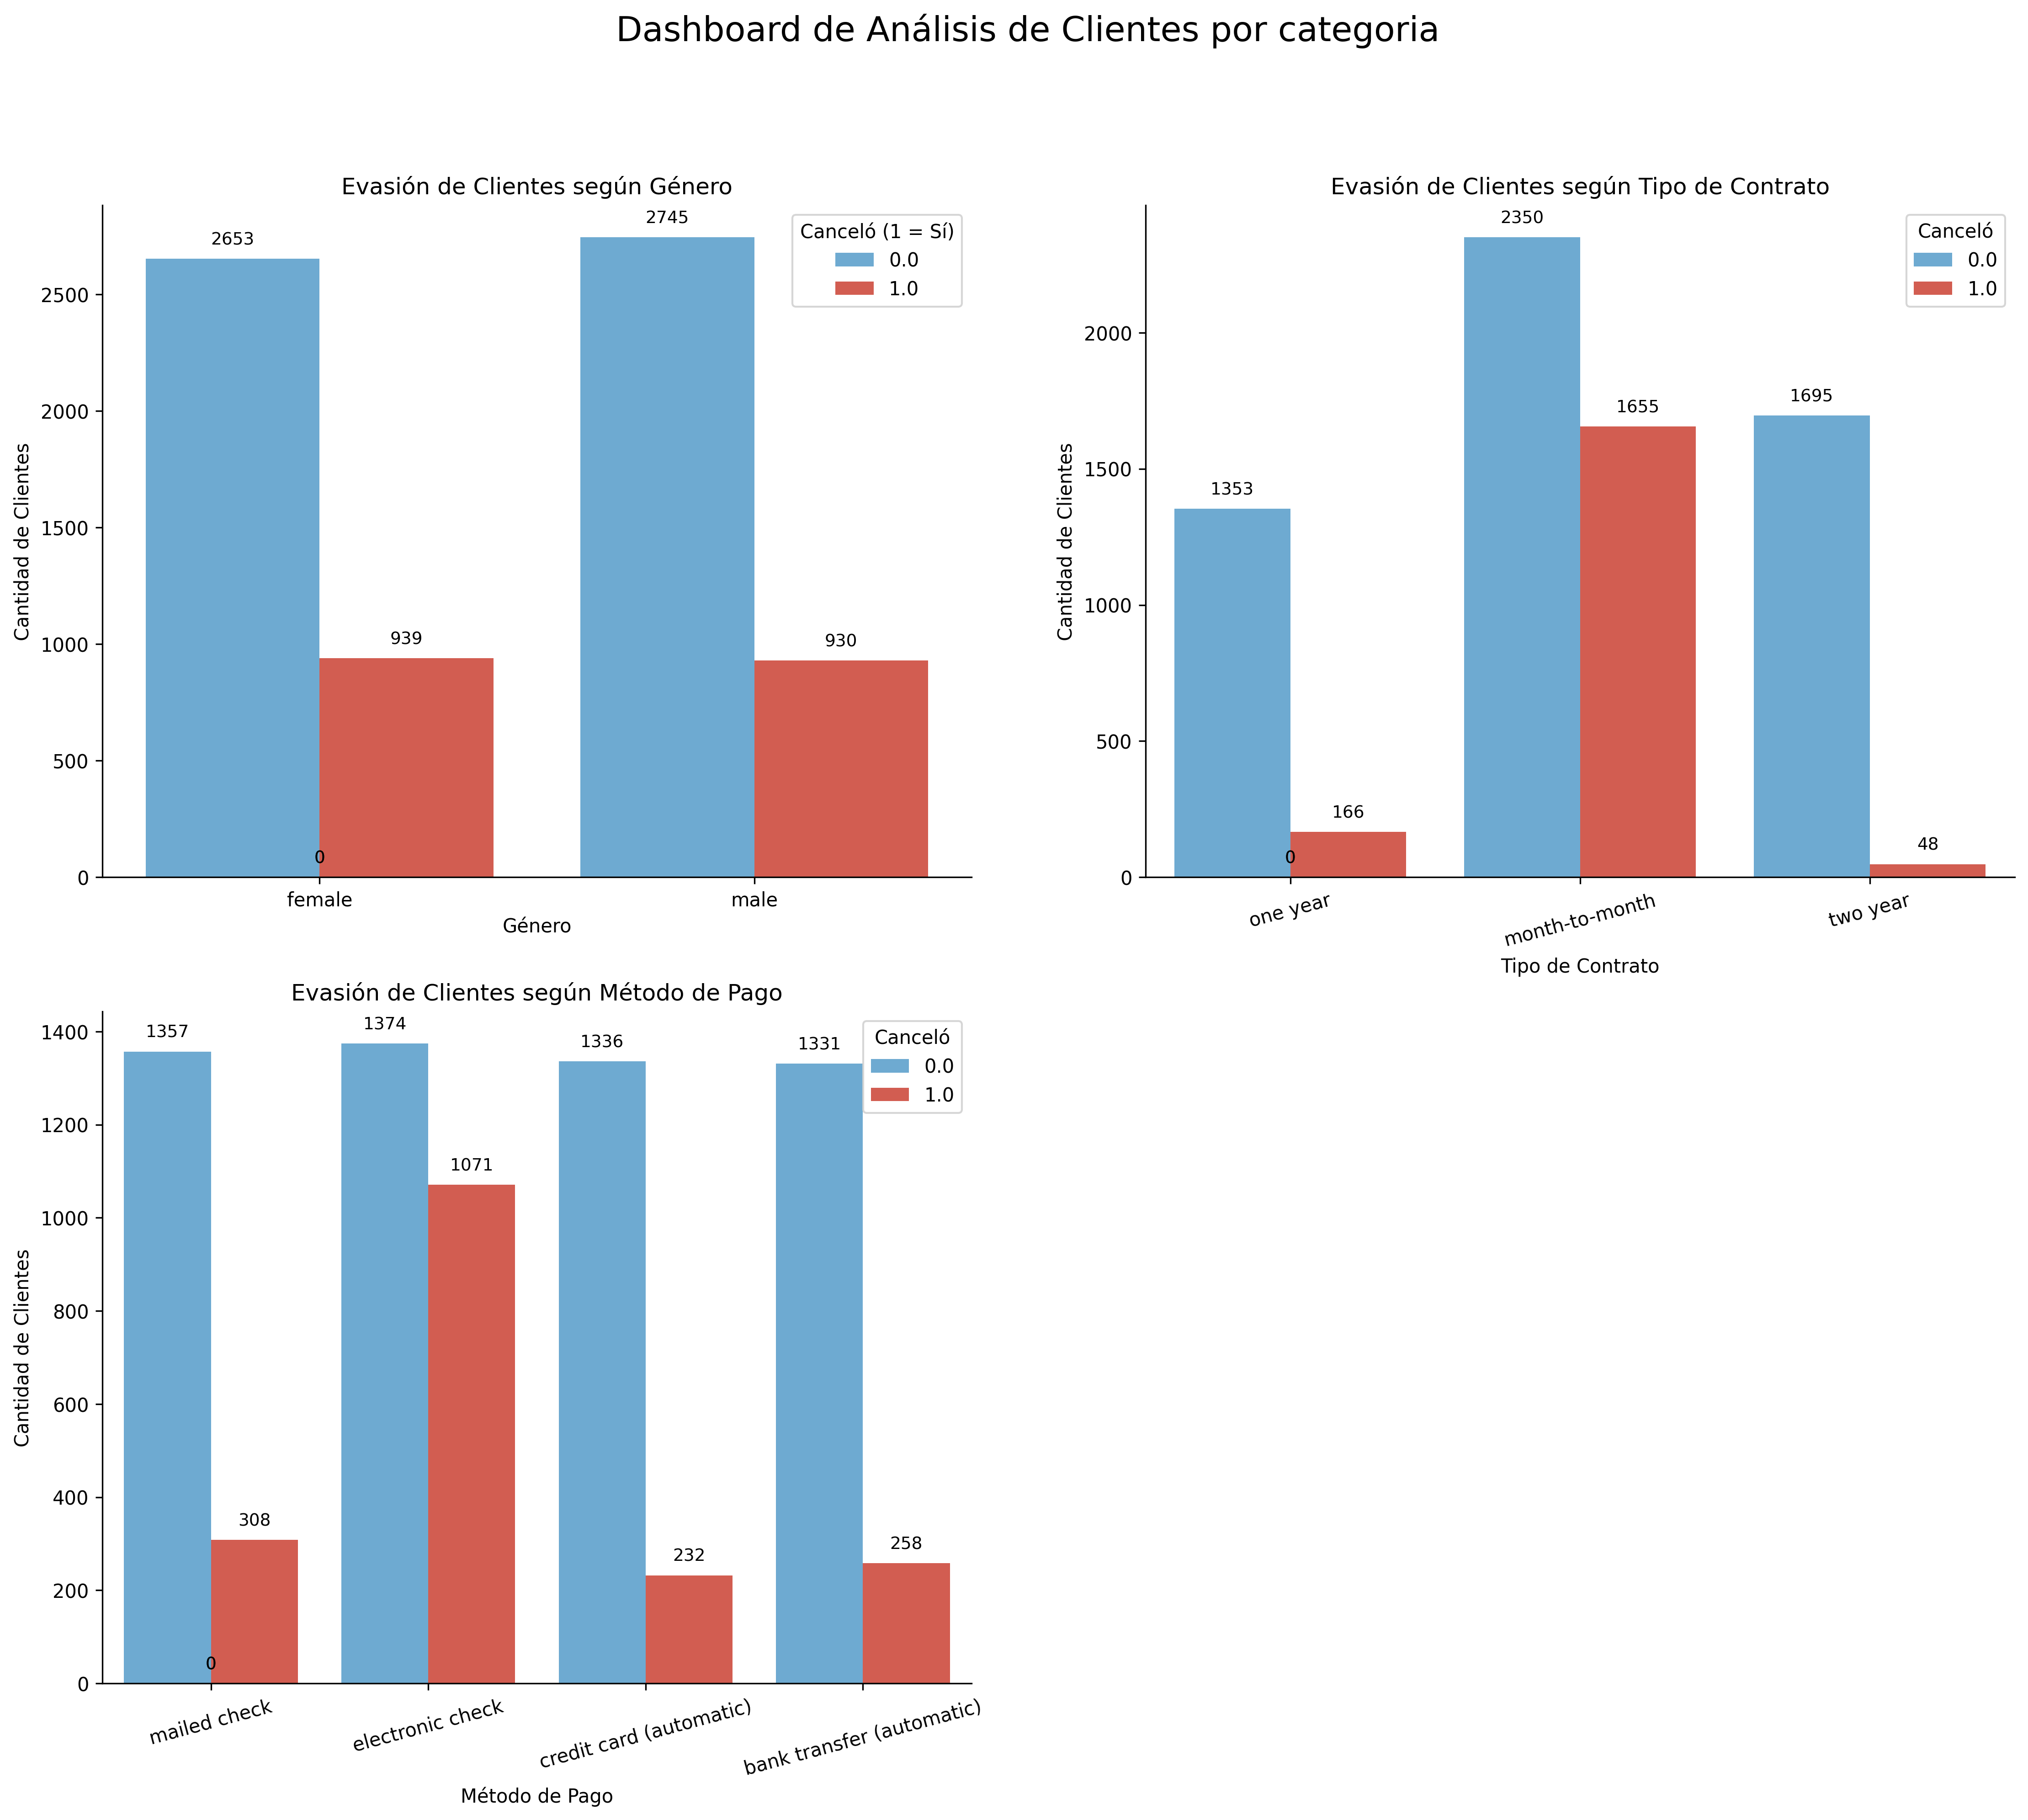

**Análisis de Variables Numéricas y su Relación con la Evasión**
Esta sección presenta las visualizaciones detalladas de las variables numéricas (`cuenta_cargos_totales` y `tiempo_contrato_meses`) en relación con el estado de cancelación.

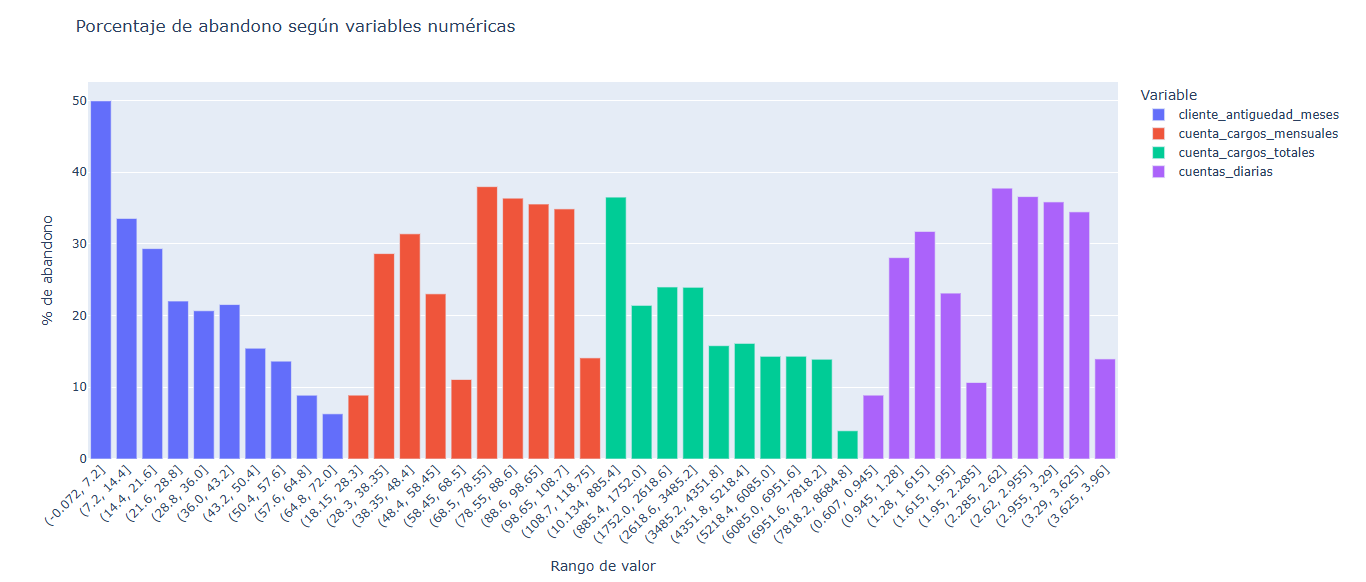

#**🔹 Conclusiones e Insights**
A partir del análisis exploratorio realizado, podemos extraer varios hallazgos clave sobre los factores que influyen en la evasión de clientes:

**Tasa de Evasión General:** Se observa que un **25.7%** de los clientes han cancelado sus servicios, lo que subraya la importancia de este análisis para la salud de la empresa.

**🔍 Análisis por variable**




**Antigüedad del cliente** (`cliente_antiguedad_meses`)

*   Mayor abandono (~50%) ocurre en los clientes con muy poca antigüedad (menos de 7 meses).
*   A medida que aumenta la antigüedad, el abandono disminuye de forma constante.
* Esto sugiere que los clientes nuevos son más propensos a cancelar.

**Cargos mensuales** (`cuenta_cargos_mensuales`)
* El abandono tiende a ser más alto en rangos intermedios (60–100).
* Curiosamente, hay una caída en los extremos más bajos y más altos.
* Esto podría indicar que los clientes que pagan demasiado poco o mucho son menos propensos a cancelar, quizá por estar más comprometidos (ej.: promociones o paquetes premium).

**Cargos totales** (`cuenta_cargos_totales`)

* Se observa una alta tasa de abandono en clientes con cargos totales moderados (250–350).

* El abandono disminuye con cargos mayores, lo cual puede indicar que los clientes de mayor antigüedad o gasto total tienden a ser más fieles.

**Cuentas diarias** (`cuentas_diarias`)

* Hay un patrón creciente: a medida que sube el número de cuentas diarias, también lo hace el abandono.

* Esto puede implicar que los clientes con más servicios simultáneos podrían sentirse saturados, confundidos o insatisfechos, lo que los lleva a cancelar.

**✅ Insights clave**

| Variable                   | Comportamiento del abandono                 | Interpretación sugerida                           |
| -------------------------- | ------------------------------------------- | ------------------------------------------------- |
| `cliente_antiguedad_meses` | Alto abandono al inicio, baja con el tiempo | Clientes nuevos son más volátiles                 |
| `cuenta_cargos_mensuales`  | Pico de abandono en cargos medios           | Sensibilidad al precio medio; extremos más leales |
| `cuenta_cargos_totales`    | Pico moderado, luego descenso               | Acumulación de gasto = más fidelización           |
| `cuentas_diarias`          | Aumenta con más cuentas                     | Posible sobrecarga o complejidad de servicios     |


**Género**

* Cantidad similar de clientes en ambos géneros: ~3600 cada uno.

* Cancelación también muy similar:

* Female: 939 cancelaron (~26%)

* Male: 930 cancelaron (~25%)

**Insight**: El género no parece ser un factor relevante para predecir la cancelación.

**Tipo de Contrato**

* month-to-month tiene la tasa de cancelación más alta:

* 1655 de 4005 clientes (~41%) cancelaron.

* one year y two year tienen tasas de cancelación mucho más bajas:

* one year: ~11%

* two year: ~3%

**Insight**: Los contratos a largo plazo reducen drásticamente la probabilidad de cancelación. El contrato mensual parece un punto crítico de evasión. Puede deberse a su flexibilidad.

**Método de Pago**

* electronic check tiene la mayor cantidad de cancelaciones:

* 1071 de 2445 (~44%) cancelaron.

* Métodos automáticos (como tarjeta o transferencia bancaria) tienen tasas mucho menores:

* credit card: ~15%

* bank transfer: ~16%

* mailed check: también baja tasa (~18%)

**Insight**: Los clientes que pagan con electronic check son más propensos a cancelar. Los métodos automáticos de pago parecen asociarse con mayor fidelidad.

**Conclusiones y recomendaciones**

| Variable         | Categoría crítica | Recomendación clave                                     |
| ---------------- | ----------------- | ------------------------------------------------------- |
| Género           | Ninguna           | No priorizar segmentación por género                    |
| Tipo de contrato | month-to-month    | Incentivar contratos largos con descuentos o beneficios |
| Método de pago   | electronic check  | Fomentar métodos automáticos (tarjeta o banco)          |


